<a href="https://colab.research.google.com/github/rrhkwk123/Work/blob/main/case_study_1_patterns_in_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import python as well as k-learn and its clustering methods and datetime for date functions.
from datetime import date
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import altair as alt
import seaborn as sns

hr = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/hr.csv")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# created new datetime object collumns
hr['dateHireObj'] = pd.to_datetime(hr['DateofHire'])
hr['dateTermObj'] = pd.to_datetime(hr['DateofTermination'])

In [ ]:
# filling in workers who had not be terminated with today's date
ct = date.today()
temp = hr.select_dtypes(include=['datetime'])
hr[temp.columns] = temp.fillna(pd.to_datetime(ct))

In [ ]:
# create months worked column
hr['monthsWorked'] = (hr['dateTermObj'].dt.year - hr['dateHireObj'].dt.year) * 12 + (hr['dateTermObj'].dt.month - hr['dateHireObj'].dt.month)


In [ ]:
# normalize the first employee engagement survey so the numbers match the satisfaction survey
hr['EngagementSurvey'] = hr['EngagementSurvey'] * 10

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fdb8906a0>,
                 k=None, metric=None, model=None, timings=True)

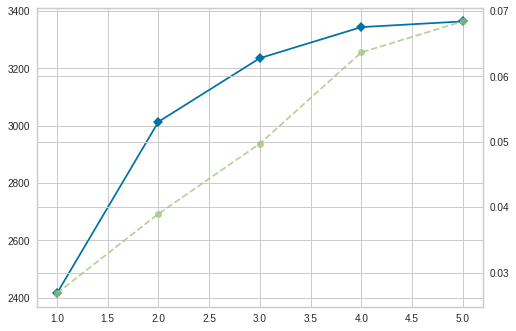

In [ ]:
# make some clusters
model = KMeans()
vis = KElbowVisualizer(model, k=(1,6))
vis.fit(hr[['EngagementSurvey', 'EmpSatisfaction2', 'monthsWorked']])

In [ ]:
# creating our labels from our clusters
kmeans = KMeans(n_clusters = 3)
hr['label'] = kmeans.fit_predict(hr[['monthsWorked', 'EngagementSurvey', 'EmpSatisfaction2']])

In [ ]:
# creating a graph based on the employee's engagement and time at the office
engagement = alt.Chart(hr).mark_circle().encode(
    x='monthsWorked',
    y='EngagementSurvey',
    color='label:N'
)

engagement

alt.Chart(...)

In [ ]:
satisfaction = alt.Chart(hr).mark_circle().encode(
    x='monthsWorked',
    y='EmpSatisfaction2',
    color='label:N',
    tooltip=(['Employee_Name', 'TermReason', 'EmploymentStatus', 'monthsWorked'])
)

satisfaction

alt.Chart(...)

In [ ]:
engagement | satisfaction

alt.HConcatChart(...)

What coorelation can we make? 

- Shorter length of employment tends to be happier
- Mid length of employment is all over the place but noticably lower than short and long term employment clusters
- Mid term ends at 80 months almost abruptly
- Long term tend to be very happy

GOAL 1 - Find similarities between those in each cluster of satisfaction

In [ ]:
long_tenure = hr[hr['label'] == 0]
mid_tenure = hr[hr['label'] == 1]
short_tenure = hr[hr['label'] == 2]

long_tenure

# long_tenure['Sex'].value_counts()
# mid_tenure['Sex'].value_counts()
# short_tenure['Sex'].value_counts()

# Does pay rate affect the clusters?


# Does gender affect the satisfaction or the length of time at the company?
long_tenure['Sex'].value_counts(normalize=True)
mid_tenure['Sex'].value_counts(normalize=True)
short_tenure['Sex'].value_counts(normalize=True)

mid_tenure['PerformanceScore'].value_counts()
# Does the performance score of an employee lead to better satisfaction?

# Does the manager make a difference in the satisfaction of an employee?

Fully Meets          55
Needs Improvement     7
PIP                   2
Exceeds               2
Name: PerformanceScore, dtype: int64

Does PayRate have an affect on the satisfaction of employees?

Does an employee's performance score have something to do with their length of tenure or overall satisfaction?

In [ ]:
# Calculate normalized percentages for the performance scores of each category.
percentages_total = hr['PerformanceScore'].value_counts(normalize= True).rename_axis('unique_values').reset_index(name='counts')
percentages_long_tenure = long_tenure['PerformanceScore'].value_counts(normalize= True).rename_axis('unique_values').reset_index(name='counts')
percentages_mid_tenure = mid_tenure['PerformanceScore'].value_counts(normalize= True).rename_axis('unique_values').reset_index(name='counts')
percentages_short_tenure = short_tenure['PerformanceScore'].value_counts(normalize= True).rename_axis('unique_values').reset_index(name='counts')

total_chart = alt.Chart(percentages_total).mark_bar().encode(
    alt.X('unique_values', title="Perf. Score Rating"),
    alt.Y('counts', title="% of total"),
).properties(
    title="Perf. Scores of Total Work Force",
    width=200
)

long_tenure_chart = alt.Chart(percentages_long_tenure).mark_bar().encode(
    alt.X('unique_values', title="Perf. Score Rating"),
    alt.Y('counts', title="% of cluster"),
).properties(
    title="Perf. Scores of Long Tenure Employees",
    width=200
)

mid_tenure_chart = alt.Chart(percentages_mid_tenure).mark_bar().encode(
    alt.X('unique_values', title="Perf. Score Rating"),
    alt.Y('counts', title="% of cluster"),
).properties(
    title="Perf. Scores of Mid Tenure Employees",
    width=200
)

short_tenure_chart = alt.Chart(percentages_short_tenure).mark_bar().encode(
    alt.X('unique_values', title="Perf. Score Rating"),
    alt.Y('counts', title="% of cluster"),
).properties(
    title="Perf. Scores of Short Tenure Employees",
    width=200
)

total_chart | long_tenure_chart | mid_tenure_chart | short_tenure_chart

alt.HConcatChart(...)

From what I can analyze here. It does not appear that there is any pattern related to performance scores and the length of tenure at the company.

In [ ]:
alt.Chart(hr).mark_boxplot().encode(
    alt.X('PerformanceScore'),
    alt.Y('EmpSatisfaction2')
).properties(
    width=400
)

alt.Chart(...)

Based on this comparison of the different performance scores and their associative scores in the Employee satisfaction, it appears that the performance scores did not affect an employee's satisfaction. Even if they scored poorly, they tended to be relatively content. An interesting note is that the "Fully Meets" category had the widest range of values reaching from 0 to 100, whereas the other categories' tails did not dip into the single digits in any case for employee satisfaction.

Does the manager matter for employee satisfaction?

In [ ]:
engagement_survey_chart = alt.Chart(hr).mark_boxplot().encode(
    alt.X('ManagerName'),
    alt.Y('EngagementSurvey', title="Engagement Survey Score")
).properties(
    title="Engagement Survey By Manager",
    width=600
)

employee_satisfaction_chart = alt.Chart(hr).mark_boxplot().encode(
    alt.X('ManagerName'),
    alt.Y('EmpSatisfaction2', title="Employee Satis. Score")
).properties(
    title= "Employee Satisfaction By Manager",
    width=600
)

engagement_survey_chart | employee_satisfaction_chart

alt.HConcatChart(...)

Due to the fact that a lot of the company seemed to be at least moderatly satisfied with the company, we looked at manager relationships. I believe this chart paints us a pretty clear picture of where the managers rank in terms of the satisfaction of their direct employees. This could be very useful for setting team goals, improving morale for particular teams and potentially turning over staff if needed.

An additional inference that can be made here confirms what we see above about the comparison of the engagement survey and the employee satisfaction survey. It appears that the engagement survey was a much more broad survey. We can see how the boxes in the left chart are much wider and therefore it is harder to see the differences between teams led by different managers.

The second chart shows tighter boxes for each manager and helps paint a little better picture of what the employees' satisfaction looks like under each manager.

It is interesting to see that the board of directors is very satisfied with the company and is one of the two highest boxes in the right chart. It would be interesting to see the heirarchy of the company and see if the boxes get lower and longer as you progress through the levels of the company. If this happens then there could be a significant communication problem between upper management and the average employee.